In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = "/content/drive/MyDrive/opiates_submissions5_LIWC.csv"
df1 = pd.read_csv(data_url)

data_url = "/content/drive/MyDrive/opiates_comments5_LIWC.csv"
df2 = pd.read_csv(data_url)

# For local environment
#df1 = pd.read_csv("opiates_submissions5_LIWC.csv")
#df2 = pd.read_csv("opiates_comments5_LIWC.csv")

In [2]:
print(df1.shape)
print(df2.shape)

(76647, 98)
(234847, 96)


In [3]:
def getDataInfo(df):
  # Display the first few rows of the dataset
  print("First few rows of the dataset:")
  print(df.head())

  # Display summary statistics for numerical columns
  print("\nSummary statistics for numerical columns:")
  print(df.describe())

  # Check for null values in each column
  print("\nNull values in each column:")
  print(df.isnull().sum())

  # Check for duplicate rows
  duplicate_rows = df[df.duplicated()]
  print("\nNumber of duplicate rows:", duplicate_rows.shape[0])

  # Action By User: check for duplicates & nulls & drop if needed

getDataInfo(df1)
getDataInfo(df2)

First few rows of the dataset:
              author                                              title  \
0       PillMomThrow  My pillhead loonybird of a mom played me for y...   
1  ilovegettinkunted  I wouldn't like to only be able to get debt la...   
2     -ShellOfLight-              Does anyone prefer FENT over reg H???   
3    la-nina-central  Saw my homegirls mom and she still out there o...   
4       kinda_sober2                          Spent a week in lockup...   

   created_utc  score subreddit  WC  Analytic  Clout  Authentic   Tone  ...  \
0   1561346309     27   opiates  48     93.26  50.00      14.24  92.40  ...   
1   1561345792      0   opiates  12     38.60   4.80       1.00  99.00  ...   
2   1561345674     11   opiates   7     68.29  92.33      13.15  25.77  ...   
3   1561344338      5   opiates  13     65.46  77.92      99.00  25.77  ...   
4   1561344189      7   opiates   5     99.00  50.00      99.00  25.77  ...   

   Comma  Colon  SemiC  QMark  Exclam  Dash

In [4]:
def getNullsAndDups(df):
  # Check for null values in each column
  null_values = df.isnull().sum()
  print("\nColumns with null values:")
  for column, count in null_values.items():
      if count > 0:
          print(f"{column}: {count} null values")

  # Check for duplicate rows
  duplicate_rows = df[df.duplicated()]
  print("\nColumns with duplicate values and the number of duplicates:")
  for column in df.columns:
      duplicate_count = df.duplicated(subset=[column]).sum()
      if duplicate_count > 0:
          print(f"{column}: {duplicate_count} duplicate values")

getNullsAndDups(df1)
getNullsAndDups(df2)


Columns with null values:
title: 2 null values

Columns with duplicate values and the number of duplicates:
author: 55255 duplicate values
title: 2917 duplicate values
created_utc: 71 duplicate values
score: 76243 duplicate values
subreddit: 76646 duplicate values
WC: 76574 duplicate values
Analytic: 75957 duplicate values
Clout: 76156 duplicate values
Authentic: 76302 duplicate values
Tone: 76521 duplicate values
WPS: 76358 duplicate values
Sixltr: 76243 duplicate values
Dic: 76091 duplicate values
function: 76071 duplicate values
pronoun: 76242 duplicate values
ppron: 76317 duplicate values
i: 76368 duplicate values
we: 76548 duplicate values
you: 76467 duplicate values
shehe: 76499 duplicate values
they: 76516 duplicate values
ipron: 76375 duplicate values
article: 76413 duplicate values
prep: 76321 duplicate values
auxverb: 76344 duplicate values
adverb: 76387 duplicate values
conj: 76392 duplicate values
negate: 76490 duplicate values
verb: 76238 duplicate values
adj: 76374 dupli

In [5]:
def dropNA(df):
  # Drop rows with null values
  print(df.shape)
  df = df.dropna()

  # Verify the shape of the cleaned dataset
  print("Shape of the cleaned dataset after dropping null values:", df.shape)

dropNA(df1)
dropNA(df2)

(76647, 98)
Shape of the cleaned dataset after dropping null values: (76645, 98)
(234847, 96)
Shape of the cleaned dataset after dropping null values: (234846, 96)


In [6]:
def dropDups(df):
  # Drop duplicate rows from the DataFrame
  num_rows = len(df)
  print(df.shape)
  df = df.drop_duplicates()
  print(df.shape)
  print(f"{num_rows - len(df)} duplicates removed")

dropDups(df1)
dropDups(df2)

(76647, 98)
(76643, 98)
4 duplicates removed
(234847, 96)
(234842, 96)
5 duplicates removed


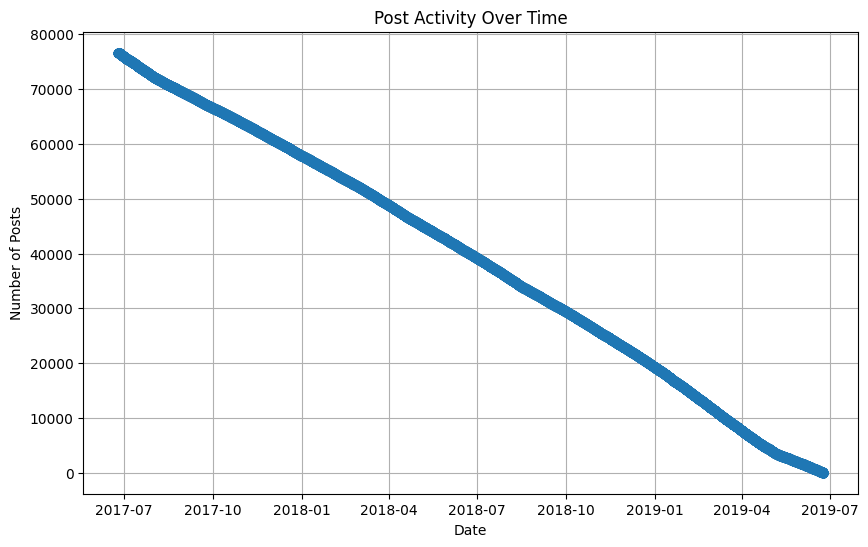

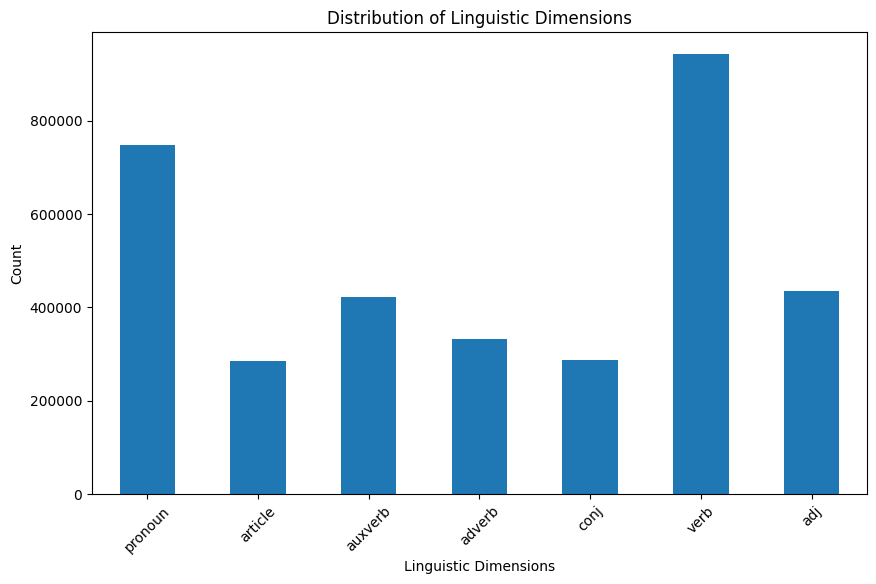

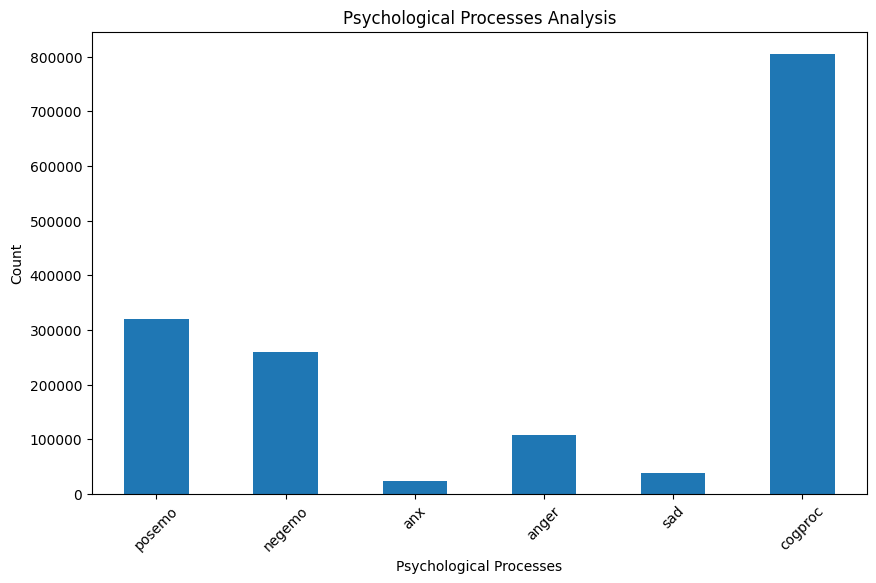

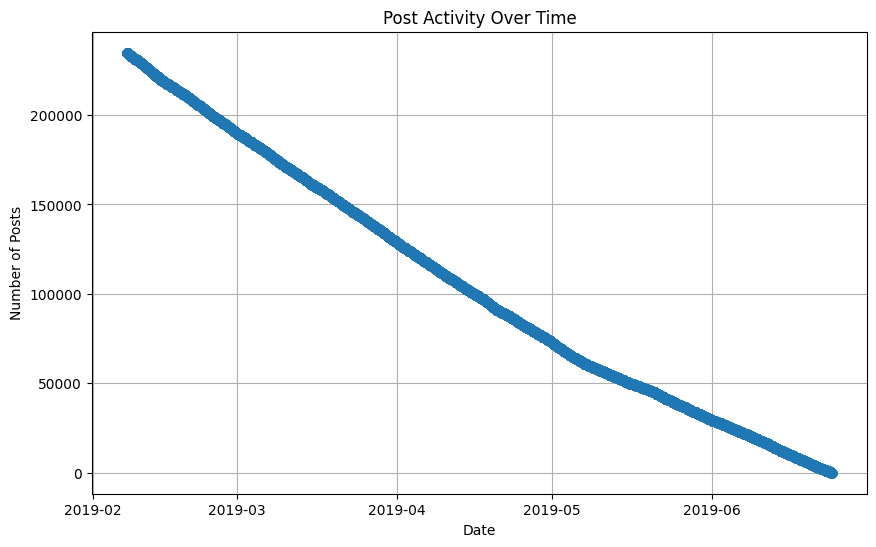

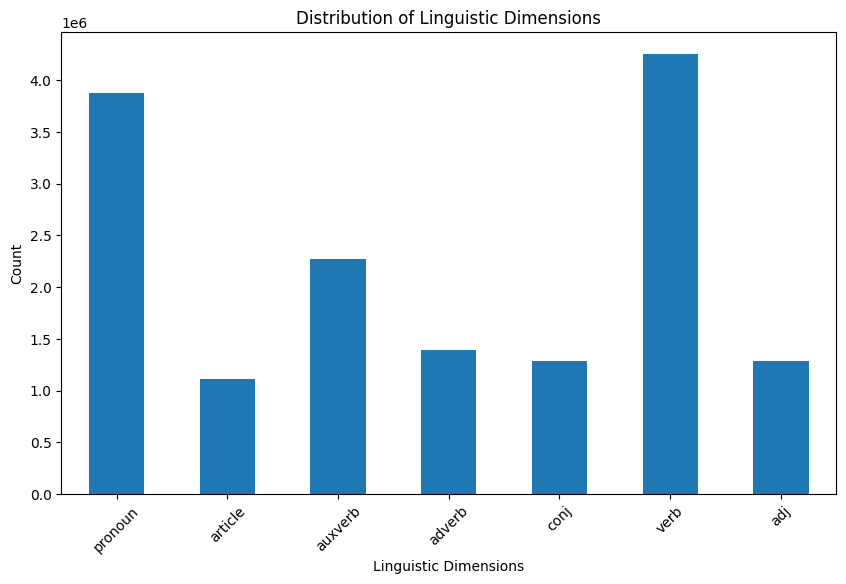

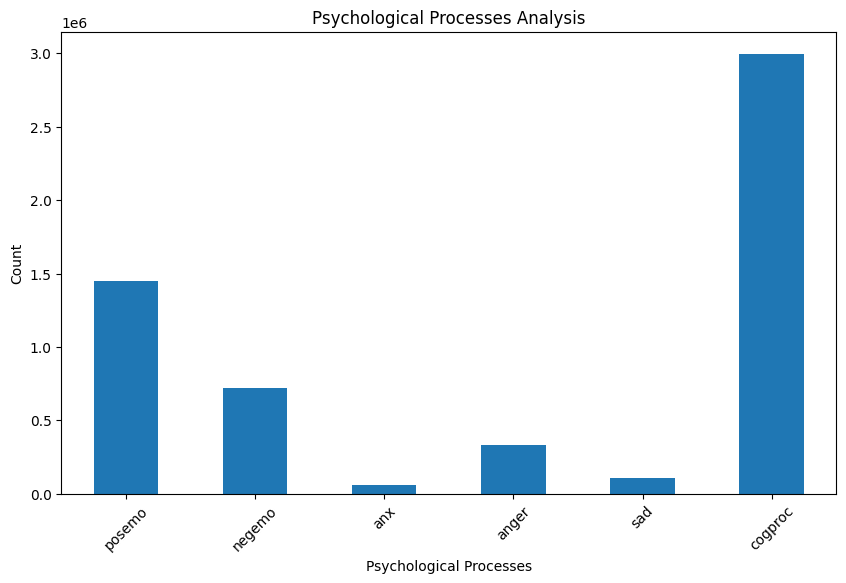

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preProcess(df):
  # Pre-processing
  # Convert 'created_utc' to datetime
  df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

  # Visualization
  # Plot 1: Time Series Analysis of Post Activity Over Time
  plt.figure(figsize=(10, 6))
  plt.plot(df['created_utc'], df.index, marker='o', linestyle='-')
  plt.title('Post Activity Over Time')
  plt.xlabel('Date')
  plt.ylabel('Number of Posts')
  plt.grid(True)
  plt.show()

  # Plot 2: Distribution of Linguistic Dimensions
  linguistic_features = ['pronoun', 'article', 'auxverb', 'adverb', 'conj', 'verb', 'adj']
  plt.figure(figsize=(10, 6))
  df[linguistic_features].sum().plot(kind='bar')
  plt.title('Distribution of Linguistic Dimensions')
  plt.xlabel('Linguistic Dimensions')
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()

  # Plot 3: Psychological Processes Analysis
  psychological_features = ['posemo', 'negemo', 'anx', 'anger', 'sad', 'cogproc']
  plt.figure(figsize=(10, 6))
  df[psychological_features].sum().plot(kind='bar')
  plt.title('Psychological Processes Analysis')
  plt.xlabel('Psychological Processes')
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()

preProcess(df1)
preProcess(df2)


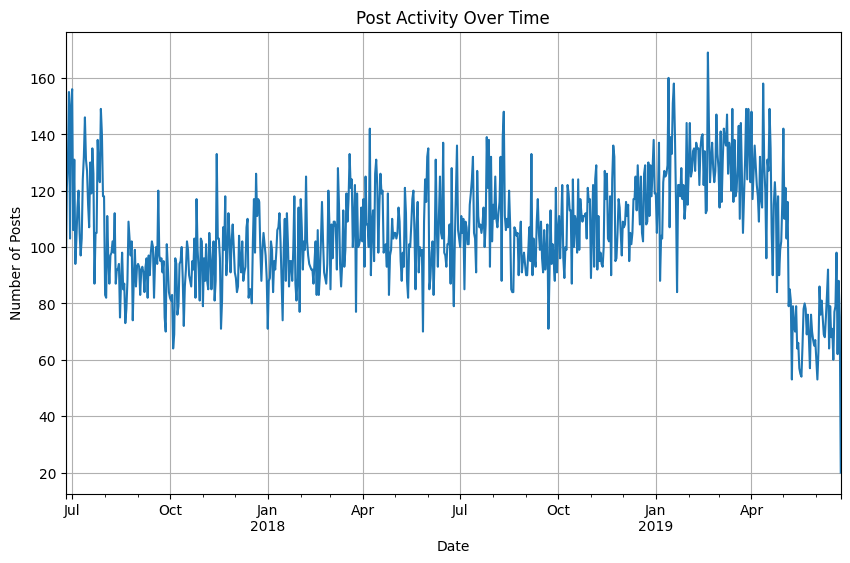

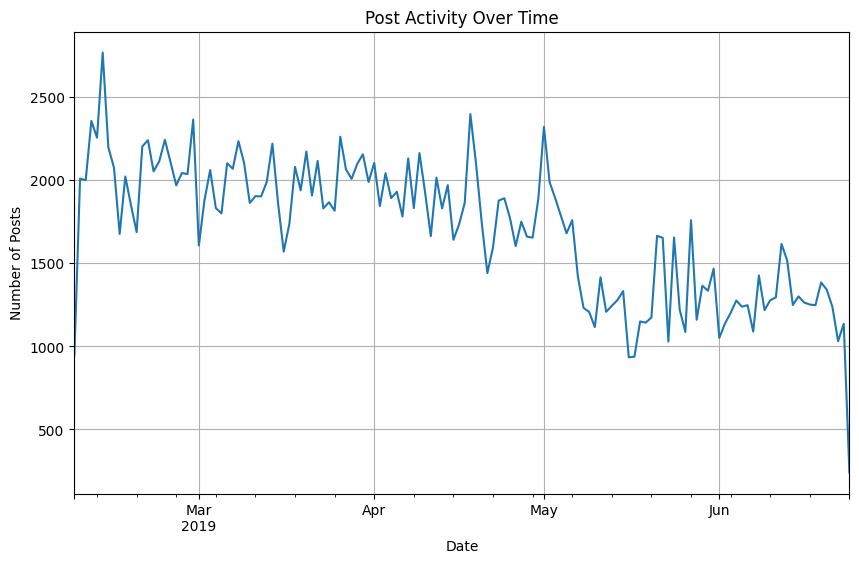

In [11]:
def plotPostActivity(df):
  plt.figure(figsize=(10, 6))
  df.set_index('created_utc').resample('D').size().plot()
  plt.title('Post Activity Over Time')
  plt.xlabel('Date')
  plt.ylabel('Number of Posts')
  plt.grid(True)
  plt.show()

plotPostActivity(df1)
plotPostActivity(df2)

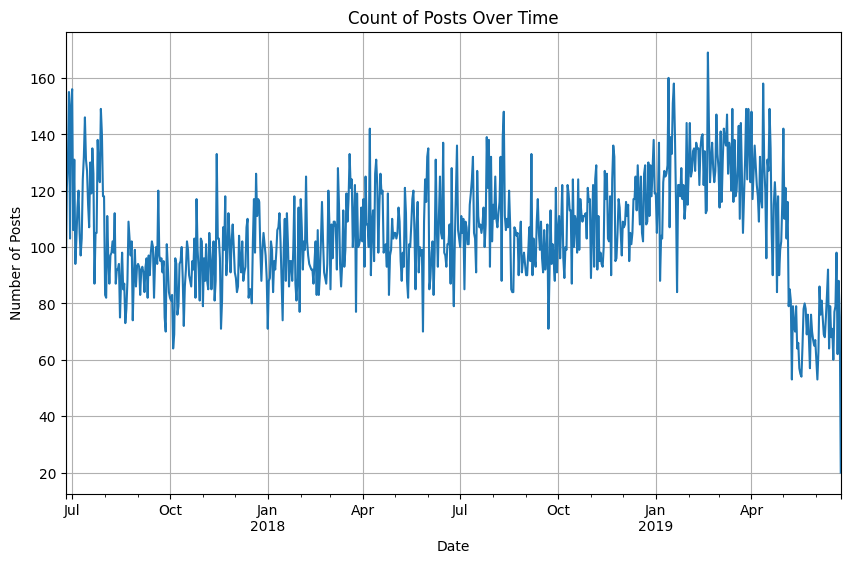

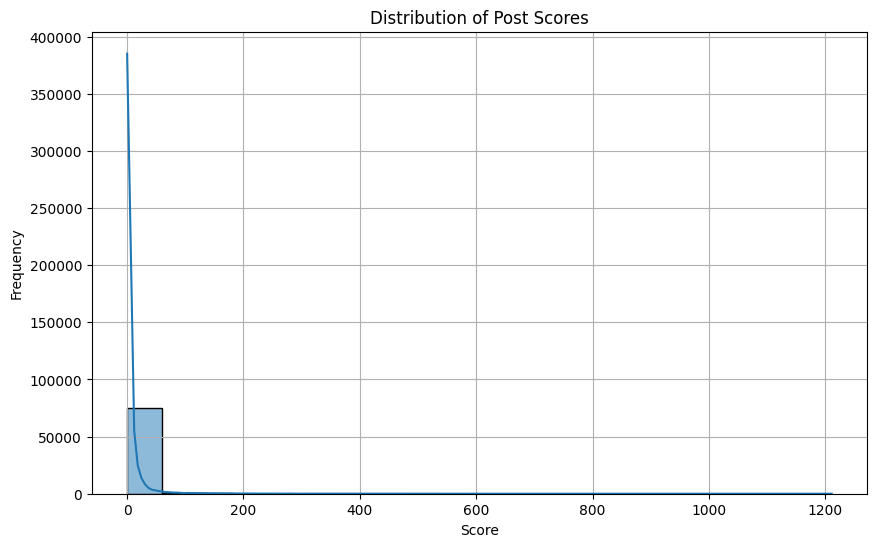

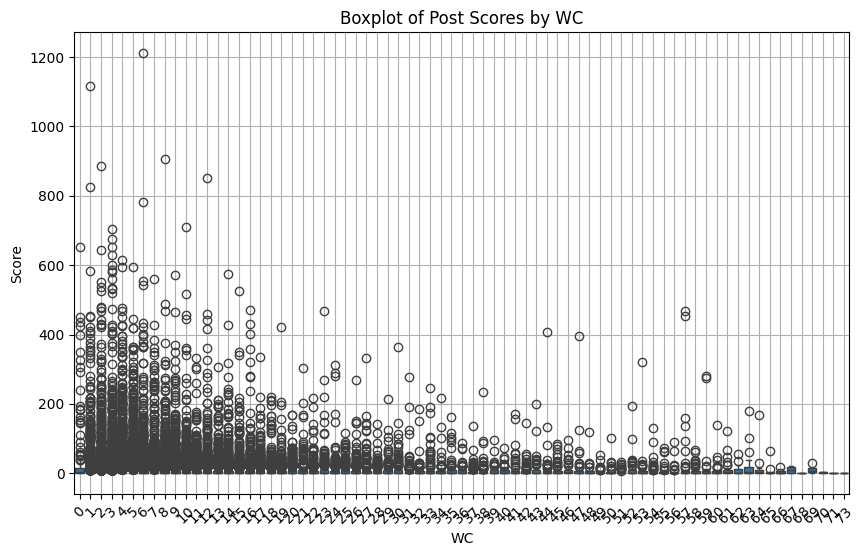

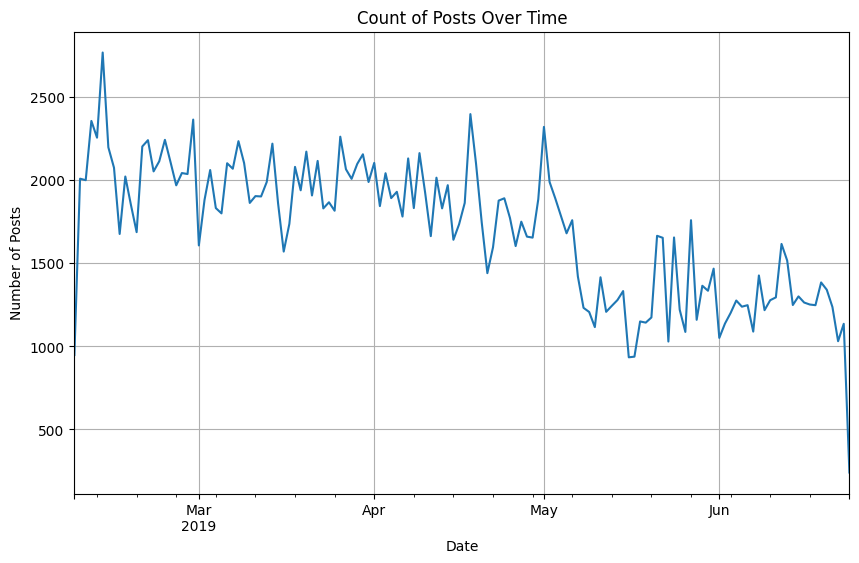

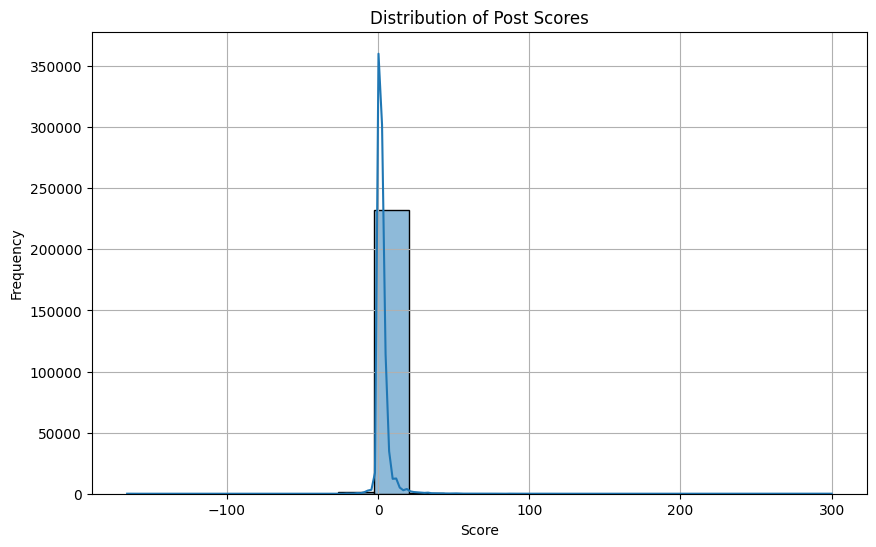

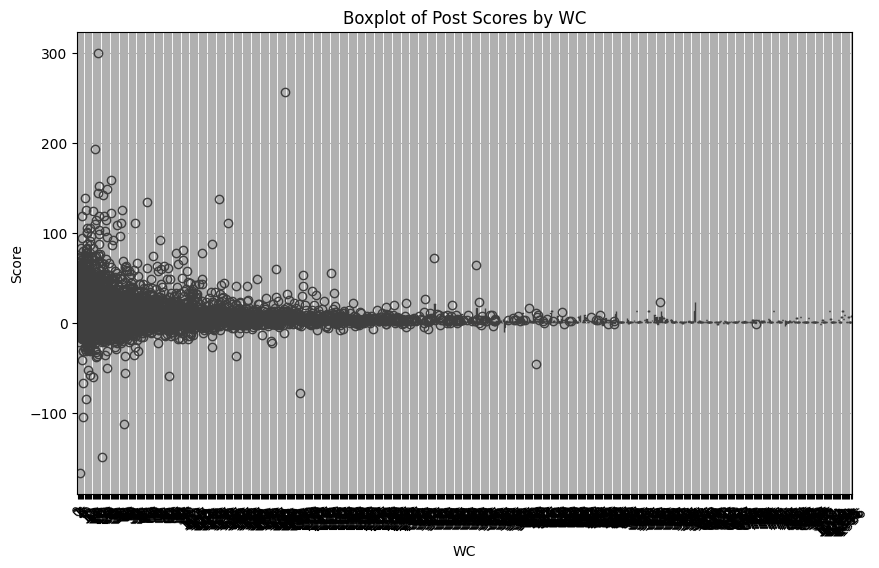

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def createVisualizations1(df):
  # Visualization 1: Progression of Count of Posts Over Time
  plt.figure(figsize=(10, 6))
  df.set_index('created_utc').resample('D').size().plot()
  plt.title('Count of Posts Over Time')
  plt.xlabel('Date')
  plt.ylabel('Number of Posts')
  plt.grid(True)
  plt.show()

  # Visualization 2: Distribution of Scores
  plt.figure(figsize=(10, 6))
  sns.histplot(df['score'], bins=20, kde=True)
  plt.title('Distribution of Post Scores')
  plt.xlabel('Score')
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

  # Visualization 3: Boxplot of WC by Subreddit
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='WC', y='score', data=df)
  plt.title('Boxplot of Post Scores by WC')
  plt.xlabel('WC')
  plt.ylabel('Score')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

createVisualizations1(df1)
createVisualizations1(df2)

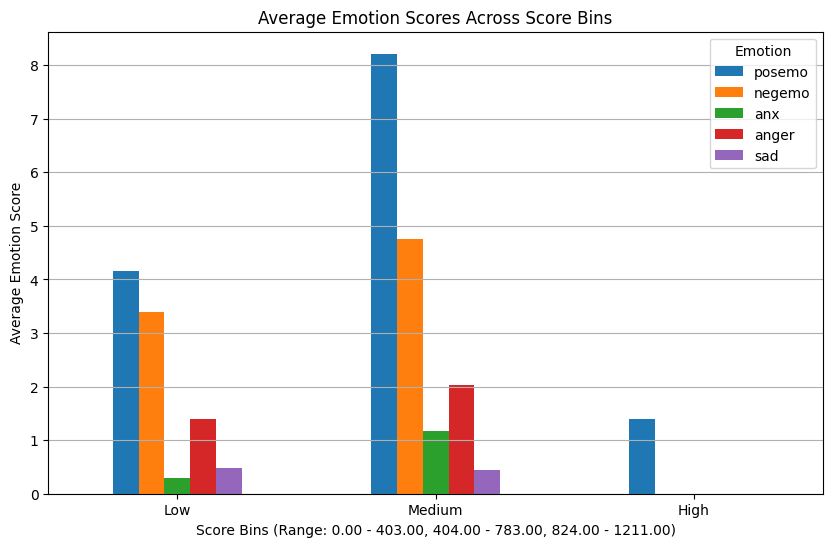

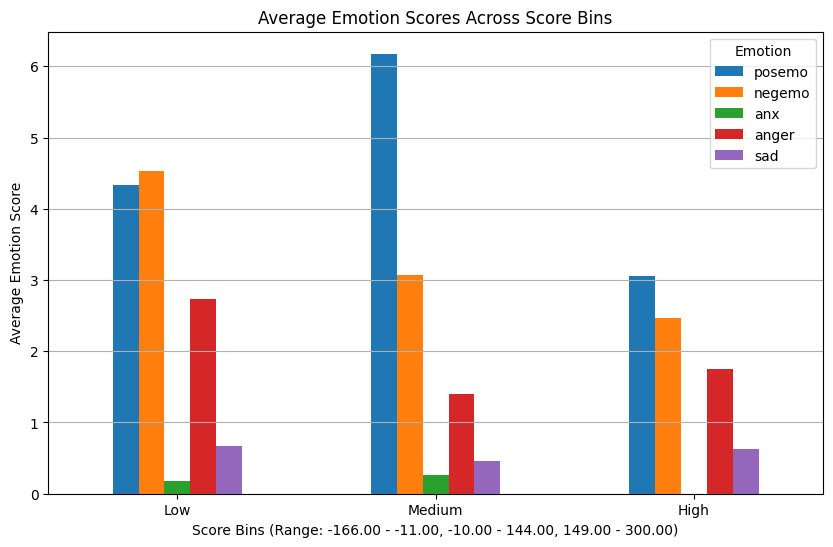

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def avgEmotionScores(df):
  # Create three bins for the score variable
  df['score_bins'] = pd.cut(df['score'], bins=3, labels=['Low', 'Medium', 'High'])

  # Specify the range of 'Low', 'Medium', and 'High' score bins
  score_ranges = ['{:.2f} - {:.2f}'.format(b[0], b[1]) for b in df.groupby('score_bins')['score'].agg(['min', 'max']).values]

  # Calculate the average values of 'posemo', 'negemo', 'anx', 'anger', 'sad' for each score bin
  emotion_scores = df.groupby('score_bins')[['posemo', 'negemo', 'anx', 'anger', 'sad']].mean()

  # Plotting bar chart
  emotion_scores.plot(kind='bar', figsize=(10, 6))
  plt.title('Average Emotion Scores Across Score Bins')
  plt.xlabel('Score Bins (Range: {})'.format(', '.join(score_ranges)))
  plt.ylabel('Average Emotion Score')
  plt.xticks(rotation=0)
  plt.grid(axis='y')
  plt.legend(title='Emotion')
  plt.show()

avgEmotionScores(df1)
avgEmotionScores(df2)

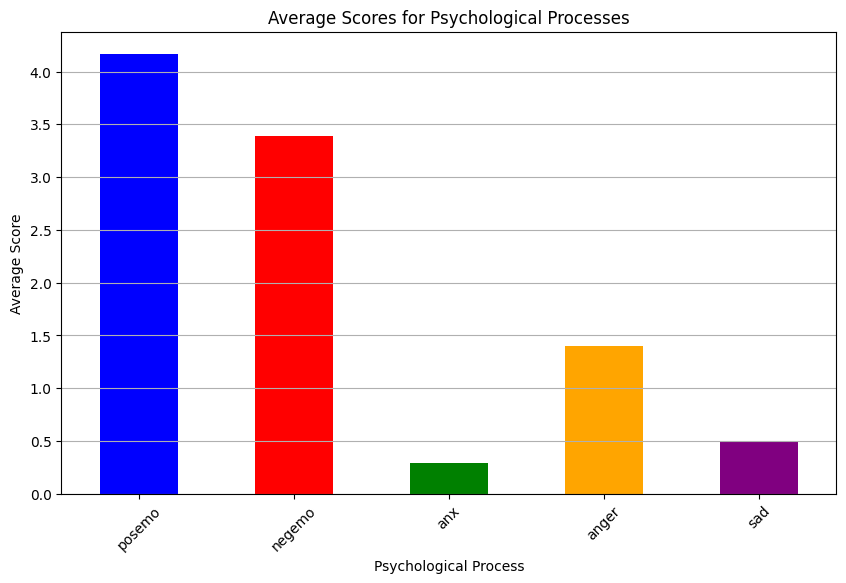

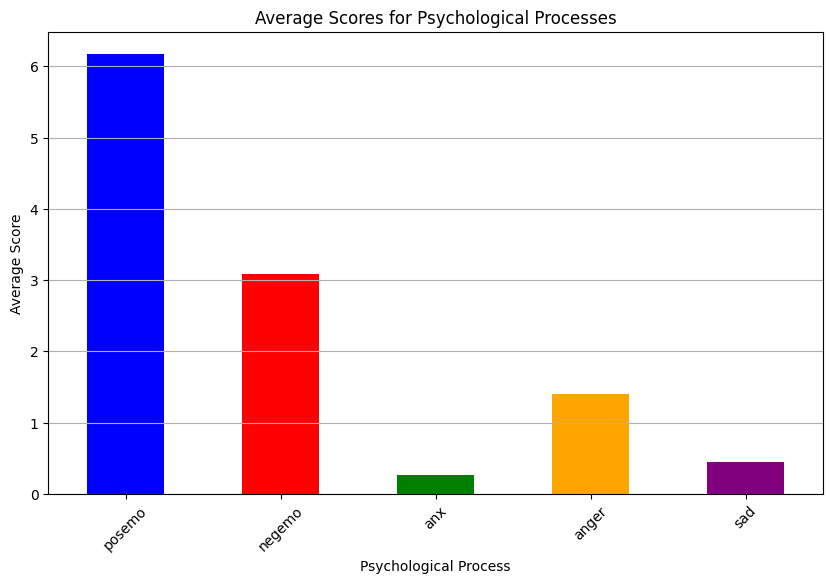

In [16]:
import matplotlib.pyplot as plt

def avgScoresPsychProcesses(df):
  # Calculate the mean score for each psychological process
  mean_scores = df[['posemo', 'negemo', 'anx', 'anger', 'sad']].mean()

  # Plot bar chart
  plt.figure(figsize=(10, 6))
  mean_scores.plot(kind='bar', color=['blue', 'red', 'green', 'orange', 'purple'])
  plt.title('Average Scores for Psychological Processes')
  plt.xlabel('Psychological Process')
  plt.ylabel('Average Score')
  plt.xticks(rotation=45)
  plt.grid(axis='y')
  plt.show()

avgScoresPsychProcesses(df1)
avgScoresPsychProcesses(df2)

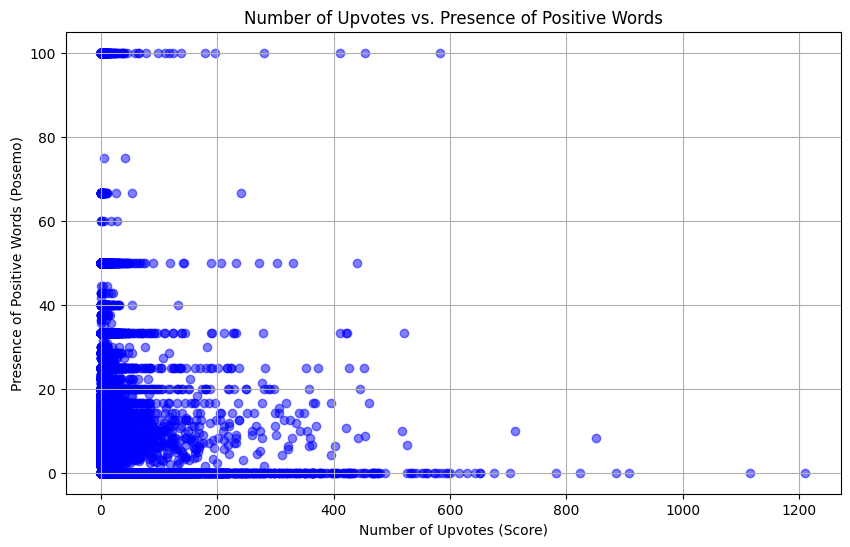

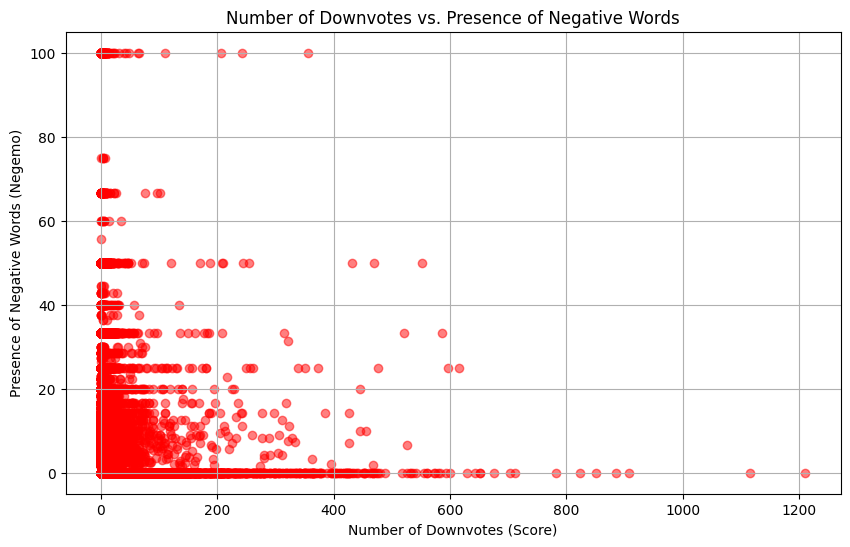

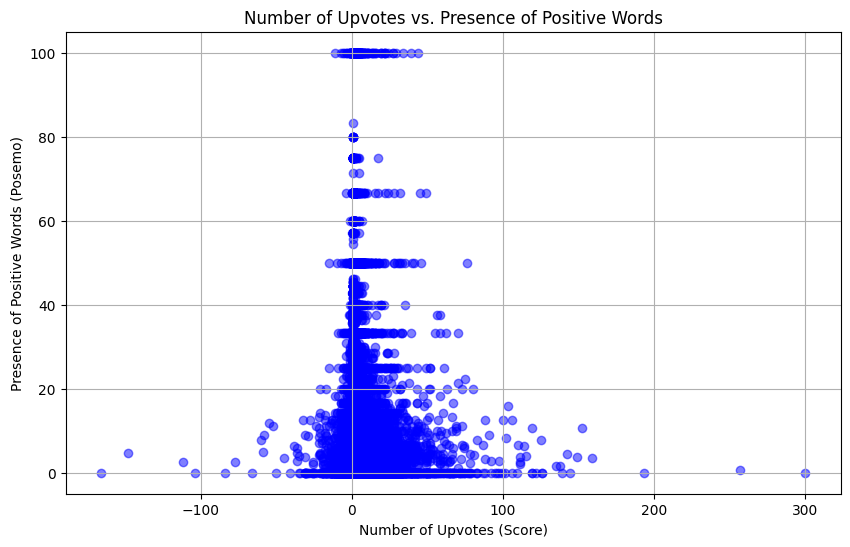

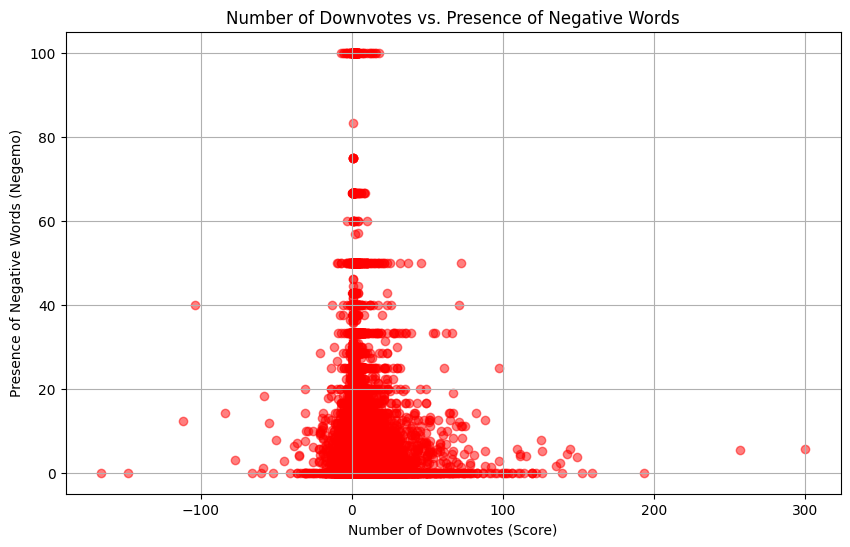

In [17]:
import matplotlib.pyplot as plt

def createScatterPlots(df):
  # Create scatter plot for upvotes vs. positive words
  plt.figure(figsize=(10, 6))
  plt.scatter(df['score'], df['posemo'], color='blue', alpha=0.5)
  plt.title('Number of Upvotes vs. Presence of Positive Words')
  plt.xlabel('Number of Upvotes (Score)')
  plt.ylabel('Presence of Positive Words (Posemo)')
  plt.grid(True)
  plt.show()

  # Create scatter plot for downvotes vs. negative words
  plt.figure(figsize=(10, 6))
  plt.scatter(df['score'], df['negemo'], color='red', alpha=0.5)
  plt.title('Number of Downvotes vs. Presence of Negative Words')
  plt.xlabel('Number of Downvotes (Score)')
  plt.ylabel('Presence of Negative Words (Negemo)')
  plt.grid(True)
  plt.show()

createScatterPlots(df1)
createScatterPlots(df2)


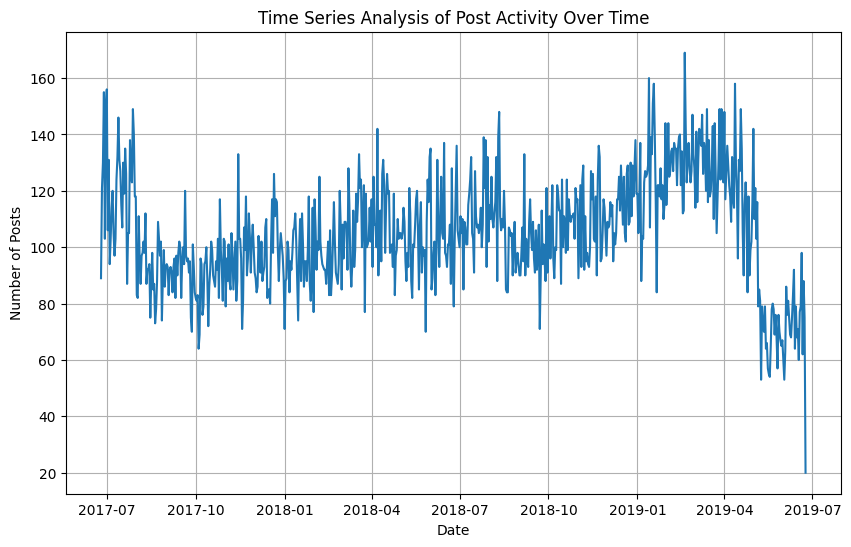

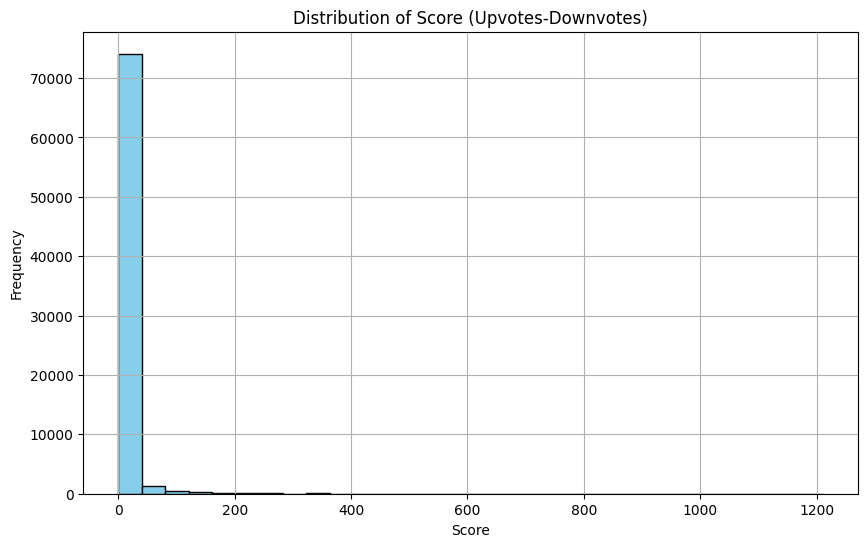

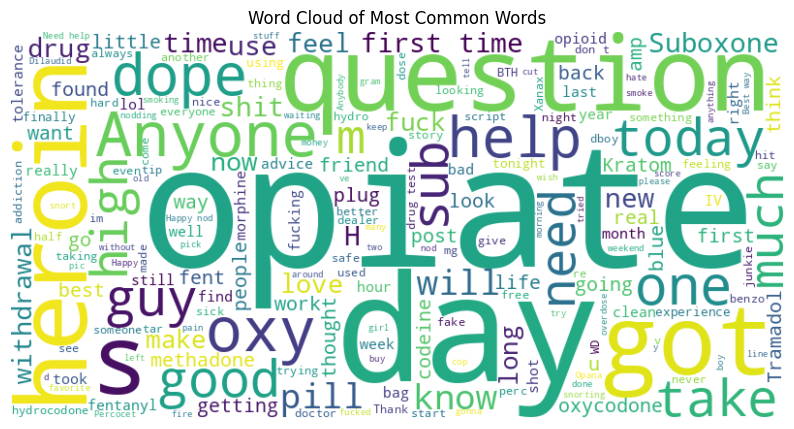

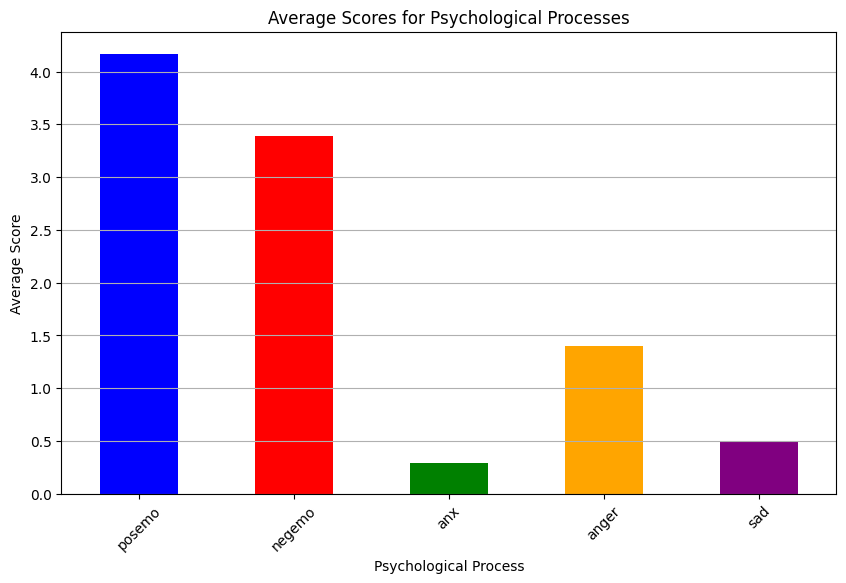

<ipython-input-20-99017c57c978>:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


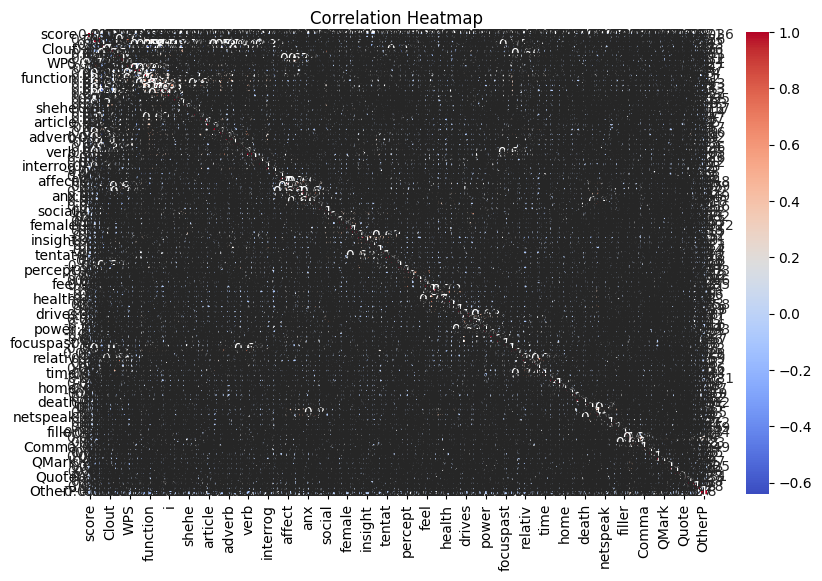

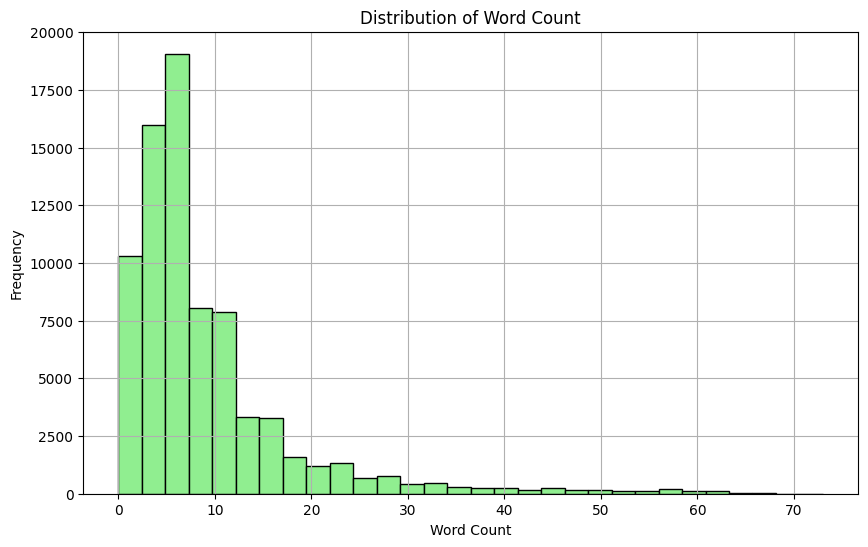

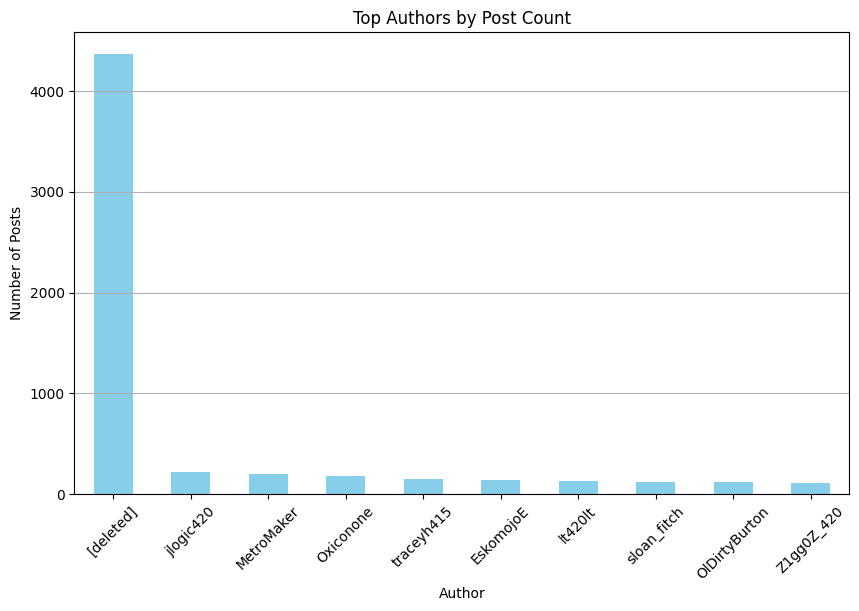

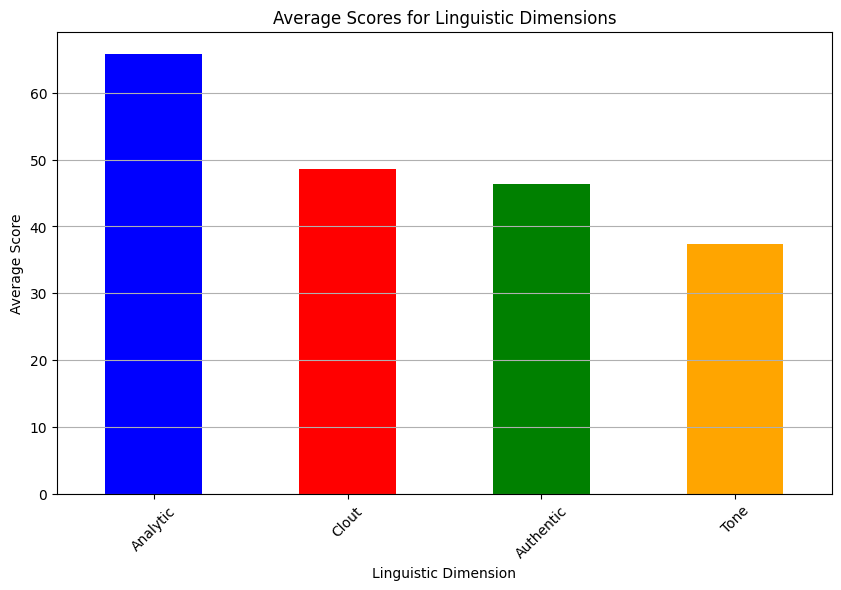

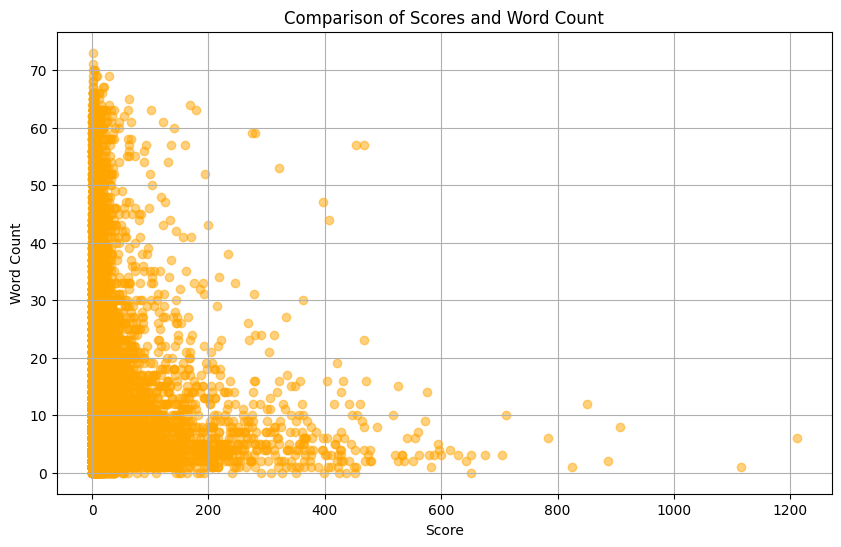

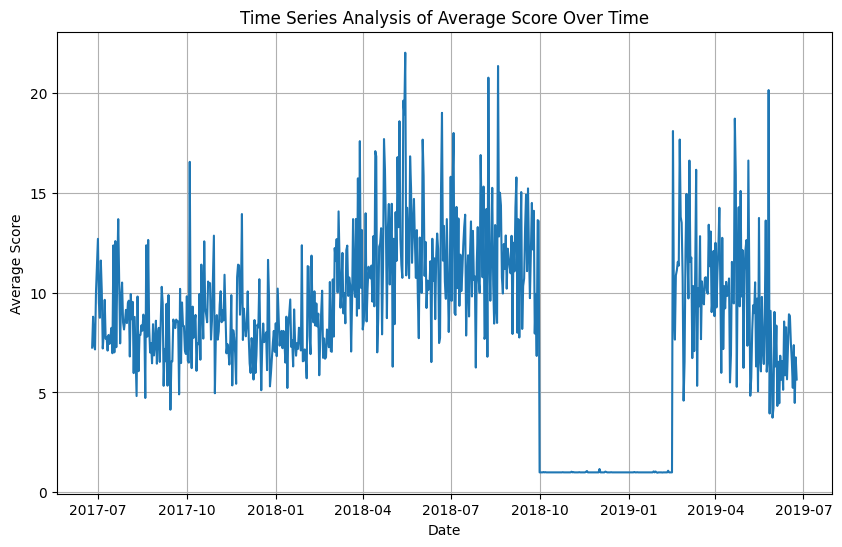

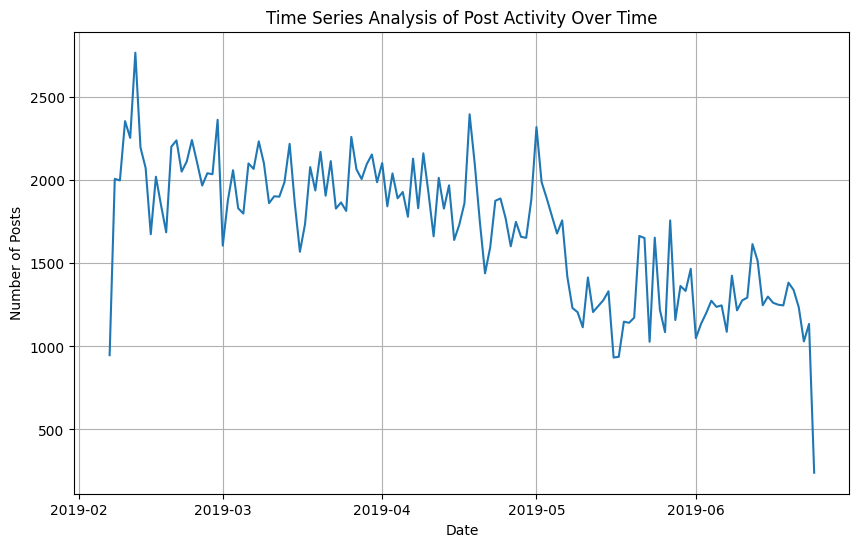

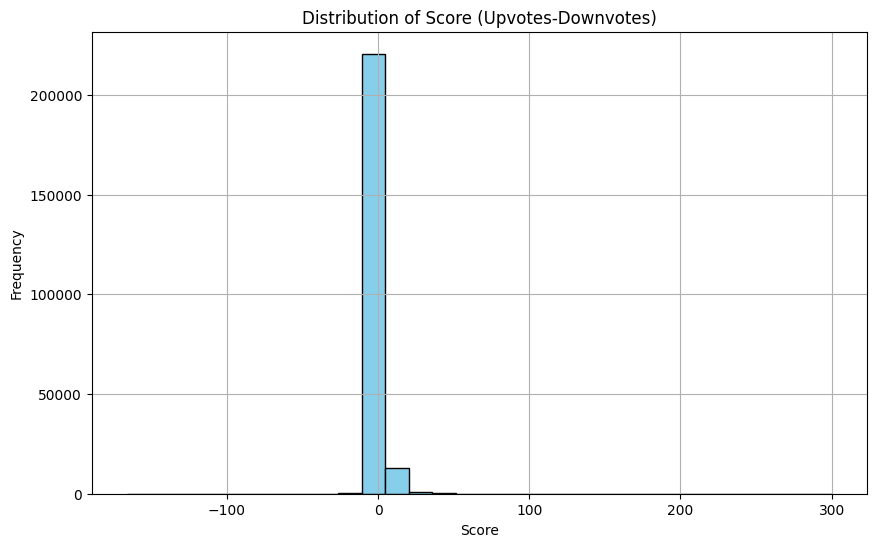

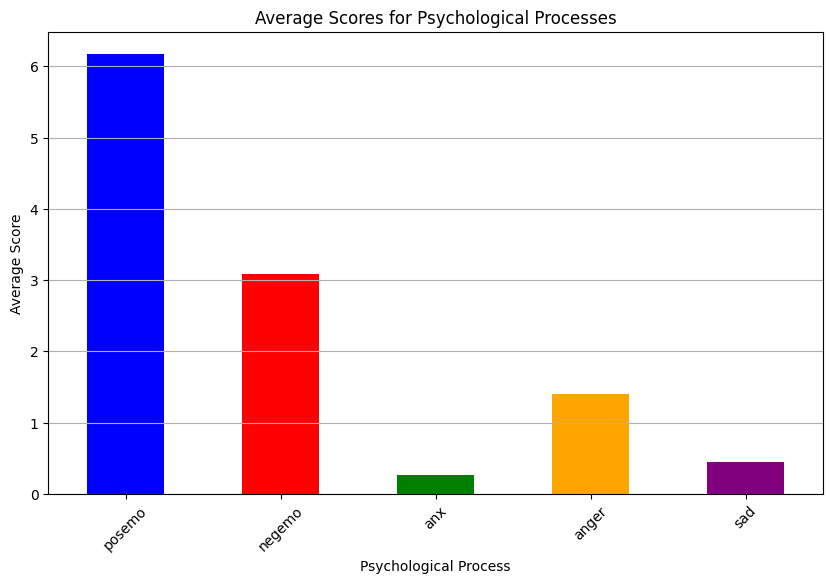

<ipython-input-20-99017c57c978>:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


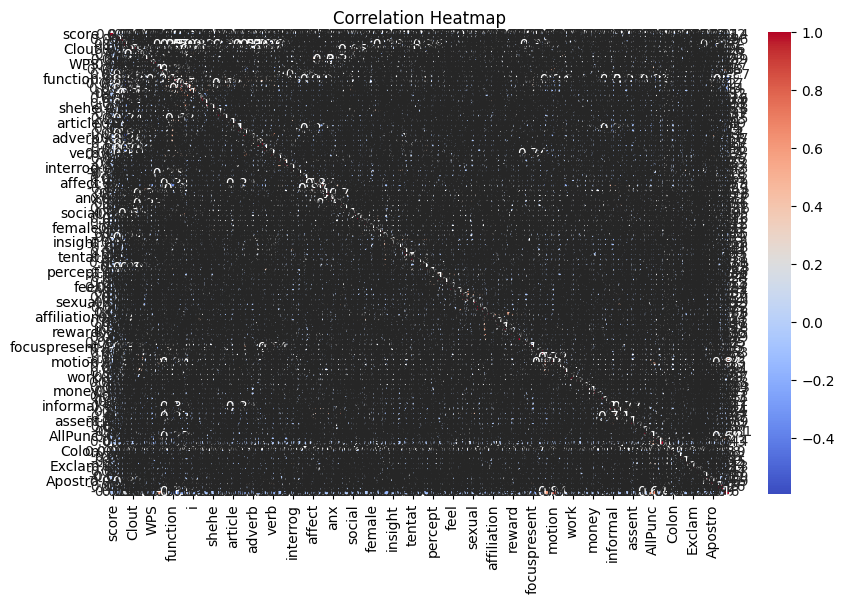

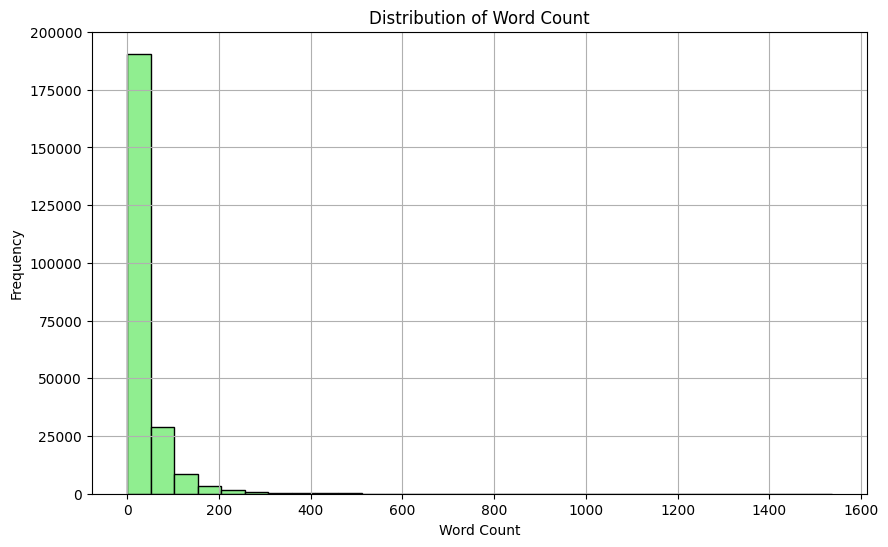

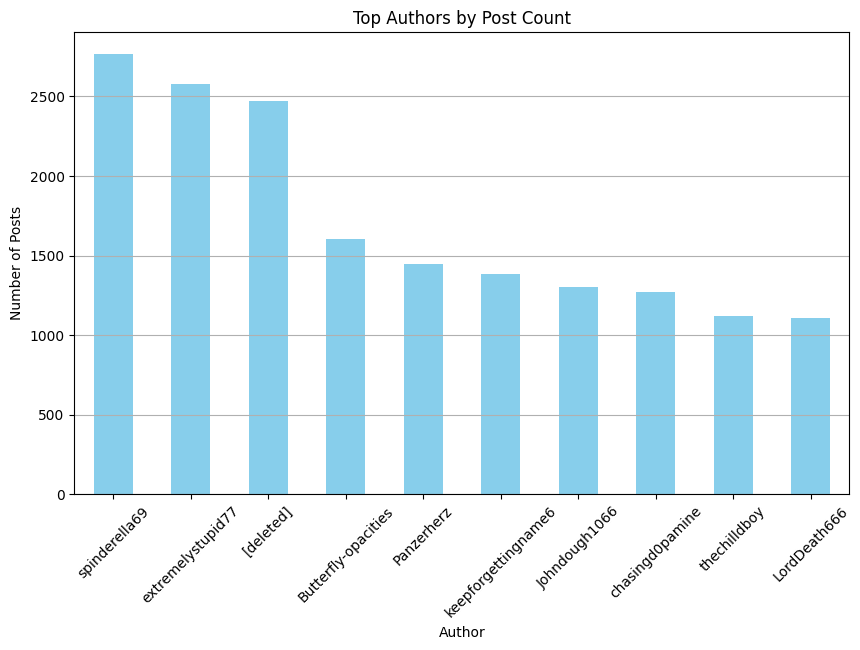

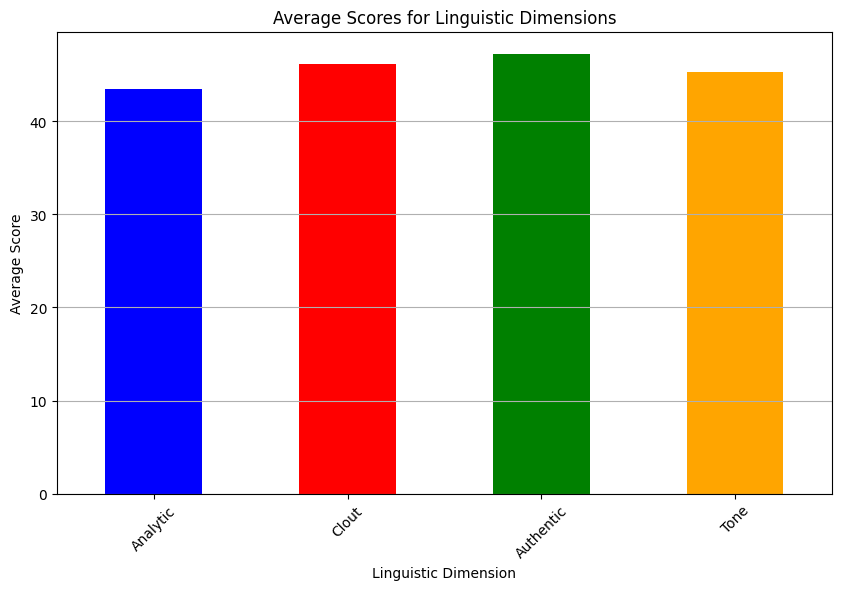

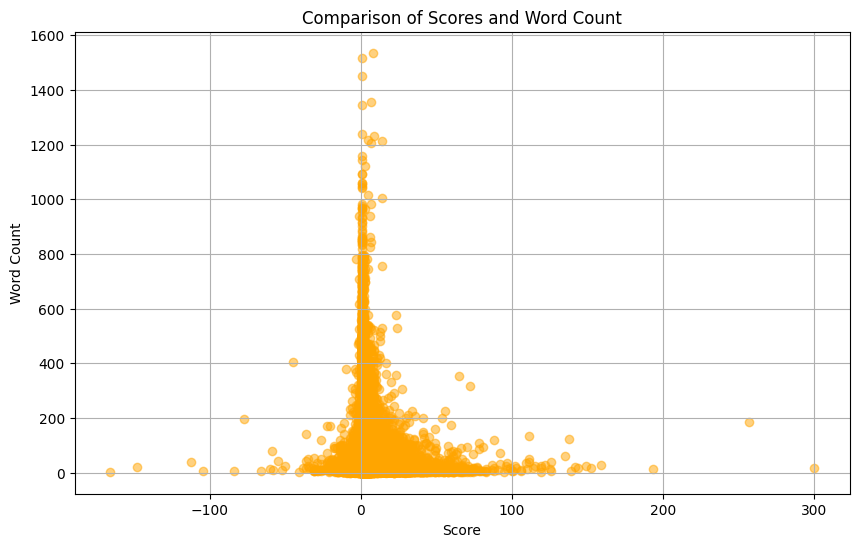

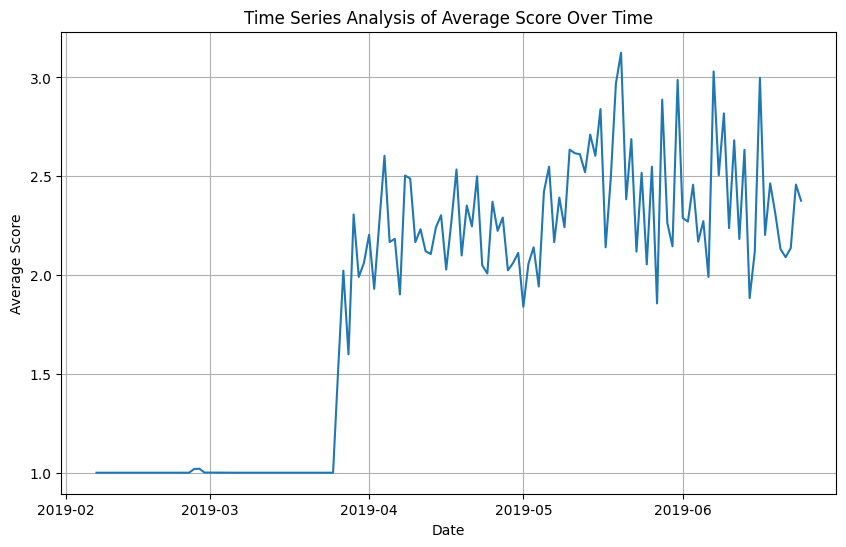

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



def createVisualizations2(df, isSubmissions):
  # Visualization 1: Time Series Analysis of Post Activity Over Time
  df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
  post_activity = df.groupby(df['created_utc'].dt.date).size()
  plt.figure(figsize=(10, 6))
  post_activity.plot()
  plt.title('Time Series Analysis of Post Activity Over Time')
  plt.xlabel('Date')
  plt.ylabel('Number of Posts')
  plt.grid(True)
  plt.show()

  # Visualization 2: Distribution of Score (Upvotes-Downvotes)
  plt.figure(figsize=(10, 6))
  plt.hist(df['score'], bins=30, color='skyblue', edgecolor='black')
  plt.title('Distribution of Score (Upvotes-Downvotes)')
  plt.xlabel('Score')
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

  if isSubmissions:
    # Visualization 3: Word Cloud of Most Common Words
    text = ' '.join(df['title'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud of Most Common Words')
    plt.axis('off')
    plt.show()

  # Visualization 4: Average Scores for Psychological Processes
  plt.figure(figsize=(10, 6))
  mean_scores_psychological = df[['posemo', 'negemo', 'anx', 'anger', 'sad']].mean()
  mean_scores_psychological.plot(kind='bar', color=['blue', 'red', 'green', 'orange', 'purple'])
  plt.title('Average Scores for Psychological Processes')
  plt.xlabel('Psychological Process')
  plt.ylabel('Average Score')
  plt.xticks(rotation=45)
  plt.grid(axis='y')
  plt.show()

  # Visualization 5: Correlation Heatmap
  plt.figure(figsize=(10, 6))
  correlation_matrix = df.corr()
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
  plt.title('Correlation Heatmap')
  plt.show()

  # Visualization 6: Distribution of Word Count
  plt.figure(figsize=(10, 6))
  plt.hist(df['WC'], bins=30, color='lightgreen', edgecolor='black')
  plt.title('Distribution of Word Count')
  plt.xlabel('Word Count')
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

  # Visualization 7: Top Authors by Post Count
  top_authors = df['author'].value_counts().head(10)
  plt.figure(figsize=(10, 6))
  top_authors.plot(kind='bar', color='skyblue')
  plt.title('Top Authors by Post Count')
  plt.xlabel('Author')
  plt.ylabel('Number of Posts')
  plt.xticks(rotation=45)
  plt.grid(axis='y')
  plt.show()

  # Visualization 8: Average Scores for Linguistic Dimensions
  plt.figure(figsize=(10, 6))
  mean_scores_linguistic = df[['Analytic', 'Clout', 'Authentic', 'Tone']].mean()
  mean_scores_linguistic.plot(kind='bar', color=['blue', 'red', 'green', 'orange'])
  plt.title('Average Scores for Linguistic Dimensions')
  plt.xlabel('Linguistic Dimension')
  plt.ylabel('Average Score')
  plt.xticks(rotation=45)
  plt.grid(axis='y')
  plt.show()

  # Visualization 9: Comparison of Scores and Word Count
  plt.figure(figsize=(10, 6))
  plt.scatter(df['score'], df['WC'], color='orange', alpha=0.5)
  plt.title('Comparison of Scores and Word Count')
  plt.xlabel('Score')
  plt.ylabel('Word Count')
  plt.grid(True)
  plt.show()

  # Visualization 10: Time Series Analysis of Score
  plt.figure(figsize=(10, 6))
  score_activity = df.groupby(df['created_utc'].dt.date)['score'].mean()
  score_activity.plot()
  plt.title('Time Series Analysis of Average Score Over Time')
  plt.xlabel('Date')
  plt.ylabel('Average Score')
  plt.grid(True)
  plt.show()

createVisualizations2(df1, True)
createVisualizations2(df2, False)